In [7]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e2.json',
    'result_1e3.json',
    'result_05e4.json',
    'result_13e4_full.json',
    'result_2e4.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1e16, 1, 1]
labels = ['1e2 Initialization',
          '1e3', 
          '5e3',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Full Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


KeyboardInterrupt: 

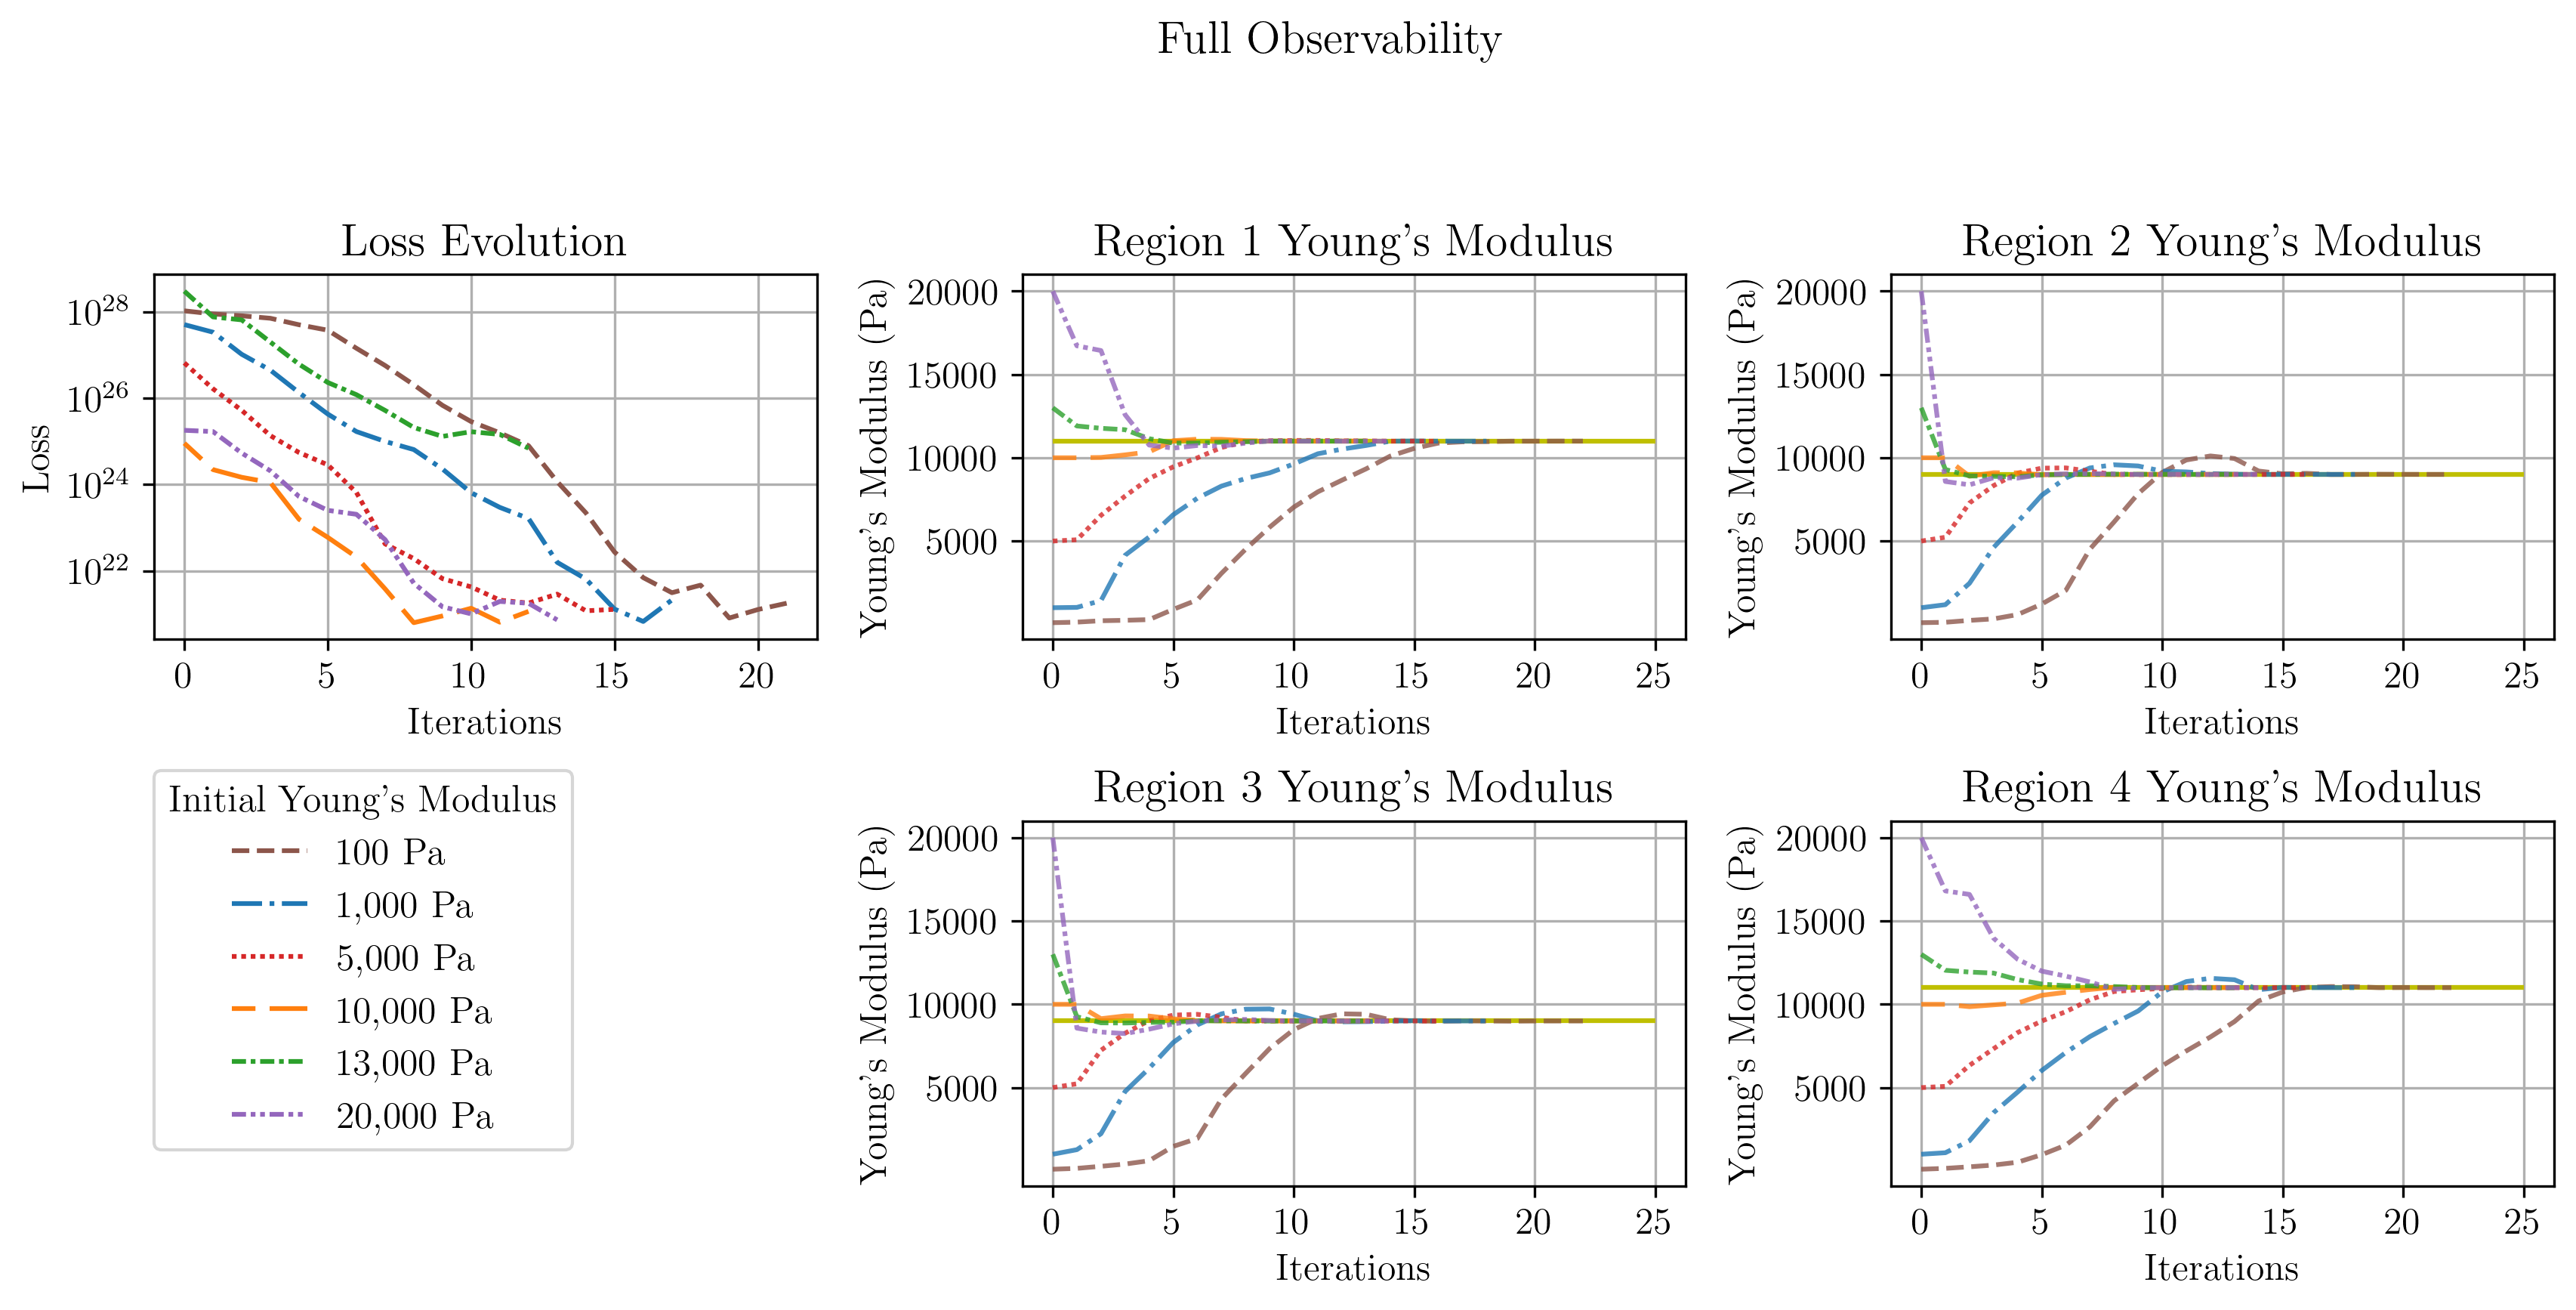

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

linestyle_str = [
    #  ('solid', 'solid'),      # Same as (0, ()) or '-'
    #  ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
    #  ('loosely dotted',        (0, (1, 10))),
    #  ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
    #  ('loosely dashed',        (0, (5, 10))),
    #  ('dashed',                (0, (5, 5))),
    #  ('densely dashed',        (0, (5, 1))),

    #  ('loosely dashdotted',    (0, (3, 10, 1, 10))),
    #  ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

    #  ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
    #  ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

filenames = [
    'result_1e2.json',
    'result_1e3.json',
    'result_05e4.json',
    'result_e_opt.json',
    'result_13e4_full.json',
    'result_2e4.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1e16, 1e16, 1e16, 1e32, 1, 1e16, 1e16]
labels = ['100 Pa',
          '1,000 Pa', 
          '5,000 Pa',
          '10,000 Pa',
          '13,000 Pa',
          '20,000 Pa',
          '8 particles, $\epsilon_{xx}$']
colors = [
    'tab:brown',
    'tab:blue',
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:purple'
]

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Full Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
axs[0, 0].grid(True)
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], color=colors[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], color=colors[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
axs[0, 1].set_xticks(np.arange(0, 30, 5))
axs[0, 2].set_xticks(np.arange(0, 30, 5))
axs[1, 1].set_xticks(np.arange(0, 30, 5))
axs[1, 2].set_xticks(np.arange(0, 30, 5))
axs[0, 1].set_yticks(np.arange(5000, 25000, 5000))
axs[0, 2].set_yticks(np.arange(5000, 25000, 5000))
axs[1, 1].set_yticks(np.arange(5000, 25000, 5000))
axs[1, 2].set_yticks(np.arange(5000, 25000, 5000))
plt.show()


In [9]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e3_row.json',
    'result_1e4_row.json',
    'result_13e4_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1e3 Initialization',
          '1e4', 
          '1.3e4',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Bottom Row Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


KeyboardInterrupt: 

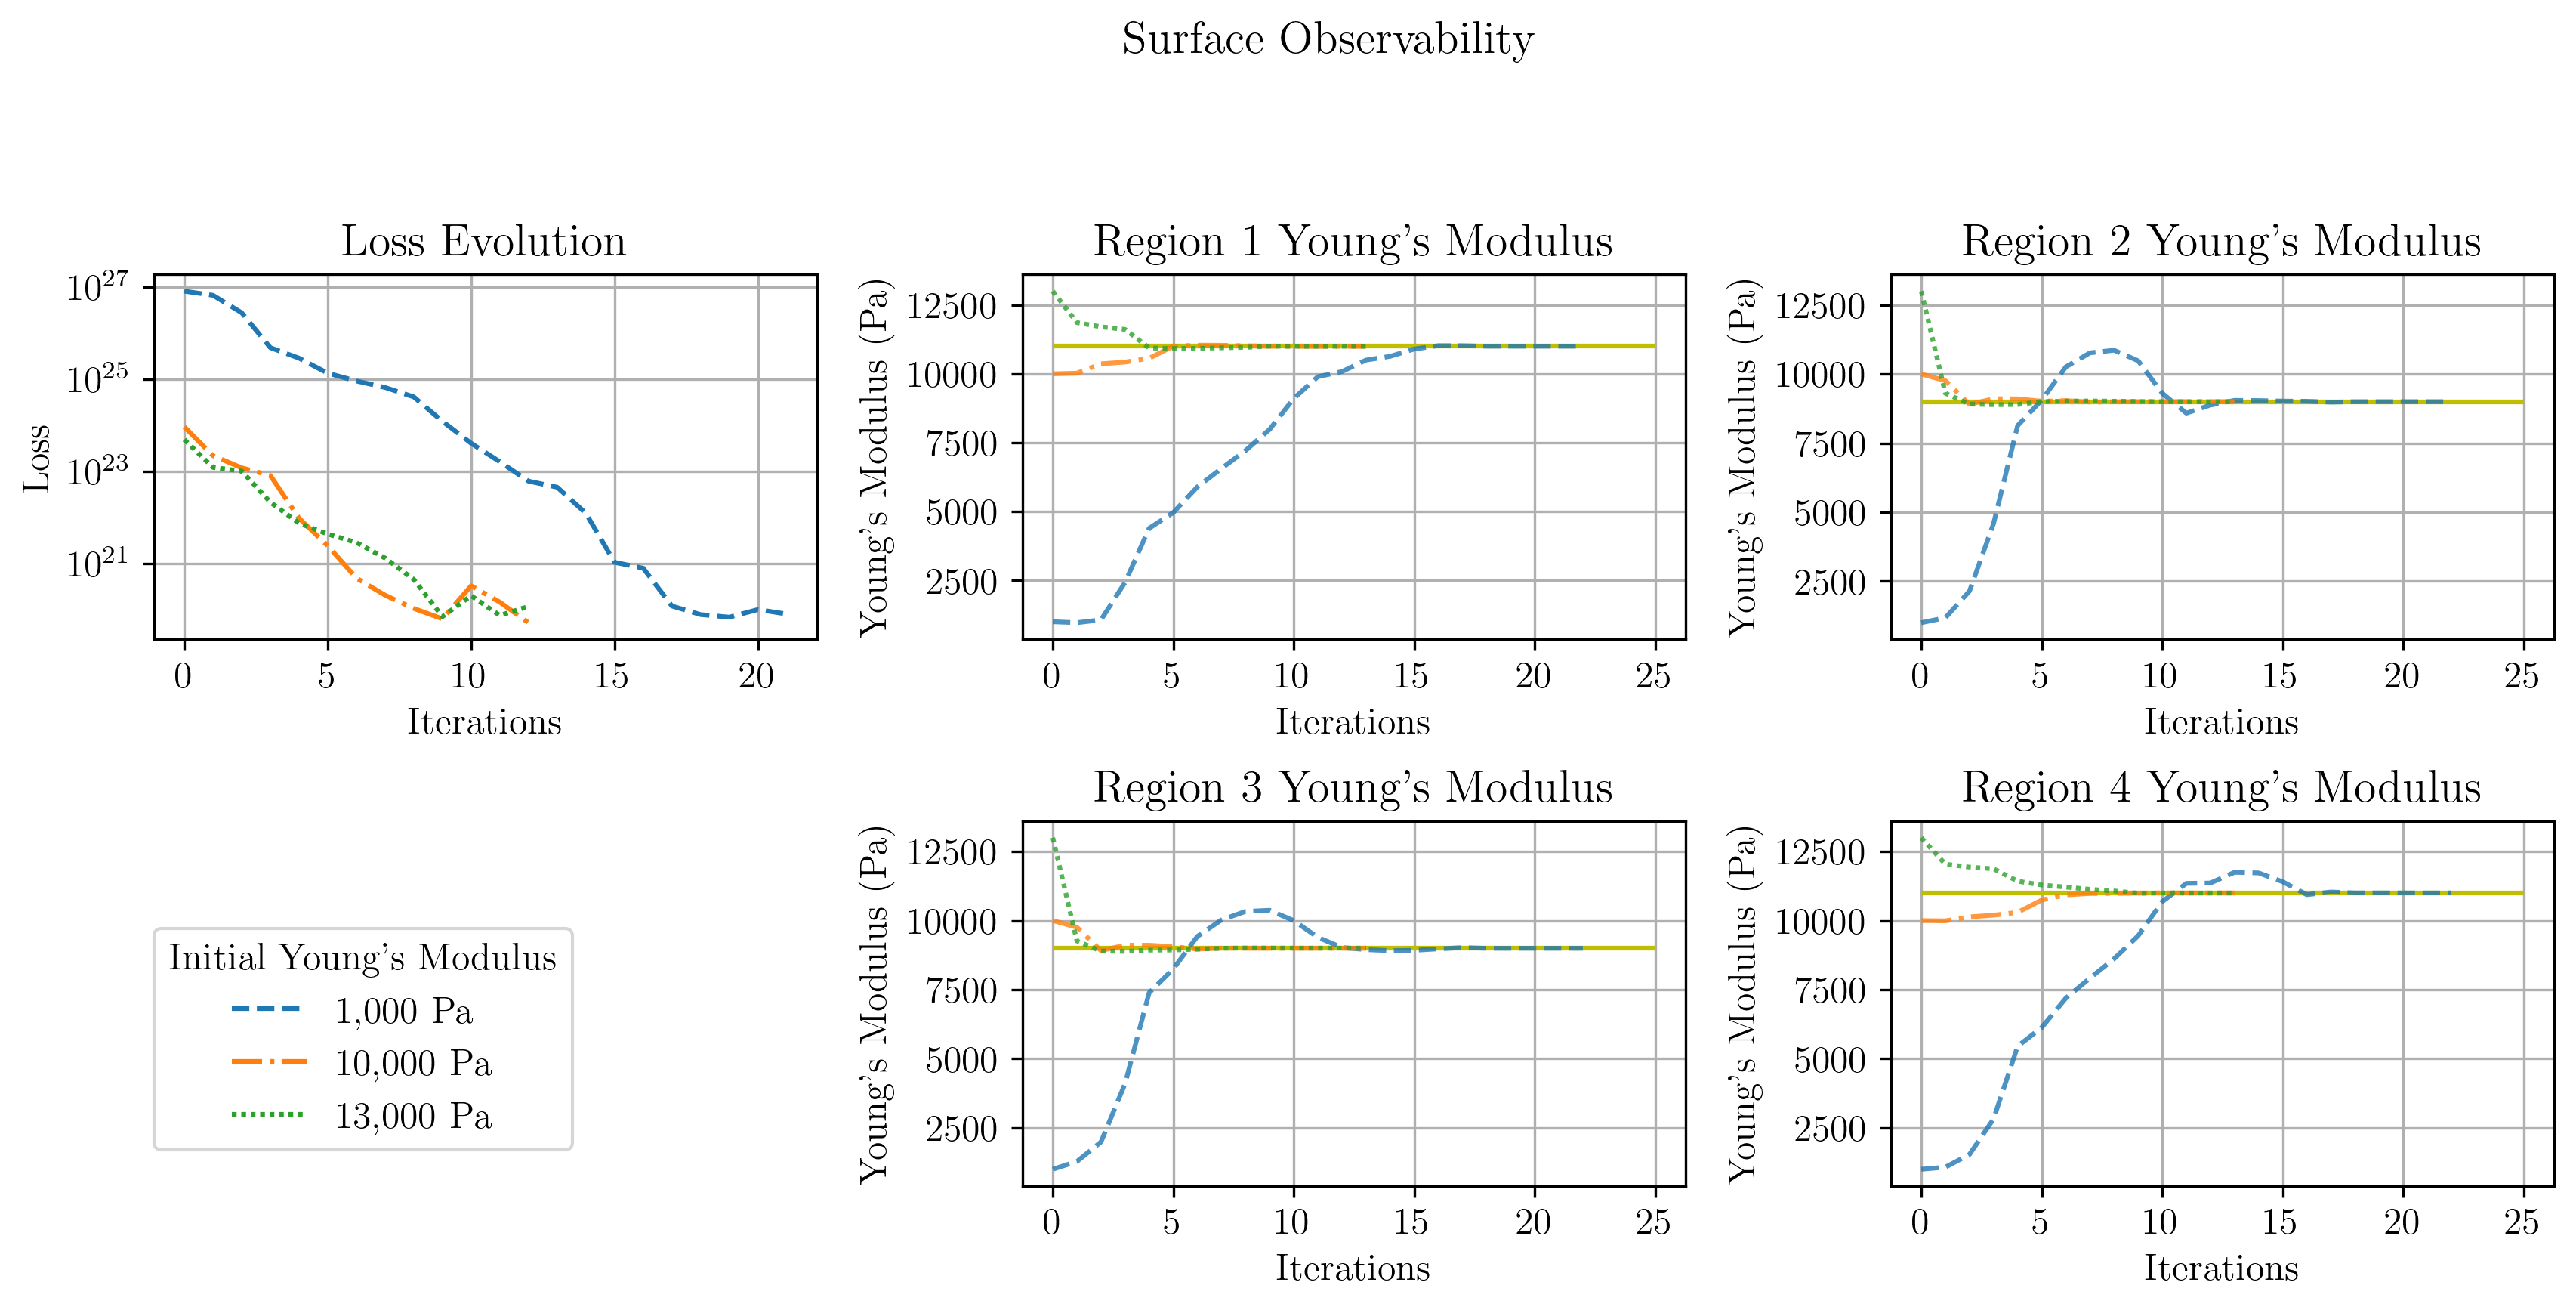

In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_1e3_row.json',
    'result_1e4_row.json',
    'result_13e4_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)

linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)


keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1e16, 1e16, 1e16, 1e16, 1e16, 1e16]
labels = ['1,000 Pa',
          '10,000 Pa', 
          '13,000 Pa',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
axs[0, 1].set_xticks(np.arange(0, 30, 5))
axs[0, 2].set_xticks(np.arange(0, 30, 5))
axs[1, 1].set_xticks(np.arange(0, 30, 5))
axs[1, 2].set_xticks(np.arange(0, 30, 5))
axs[0, 1].set_yticks(np.arange(2500, 15000, 2500))
axs[0, 2].set_yticks(np.arange(2500, 15000, 2500))
axs[1, 1].set_yticks(np.arange(2500, 15000, 2500))
axs[1, 2].set_yticks(np.arange(2500, 15000, 2500))
plt.show()


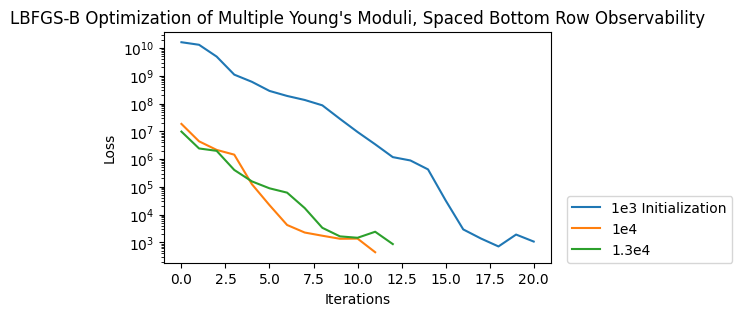

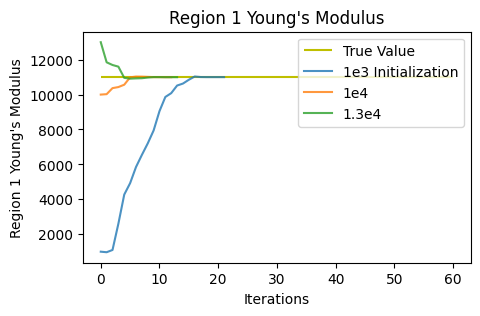

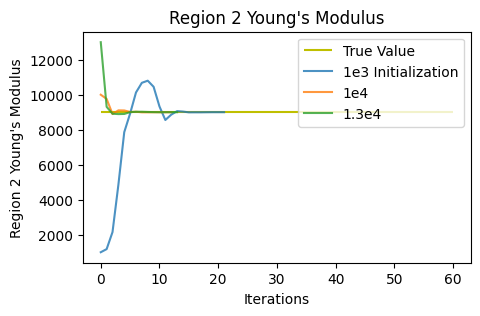

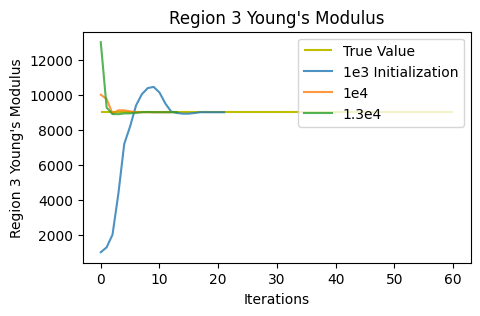

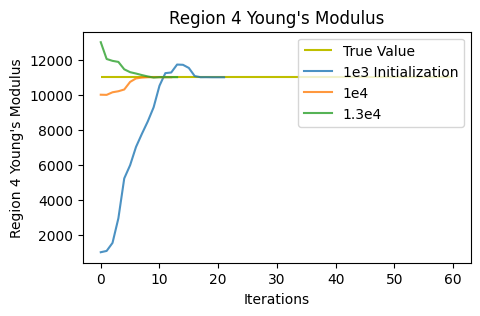

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_1e3_sensor.json',
    'result_1e4_sensor.json',
    'result_13e4_sensor.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)

linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)


keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1e-20, 1e-20, 1e-20, 1, 1, 1]
labels = ['1e3 Initialization',
          '1e4', 
          '1.3e4',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli, Spaced Bottom Row Observability")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    plt.legend()
    plt.show()


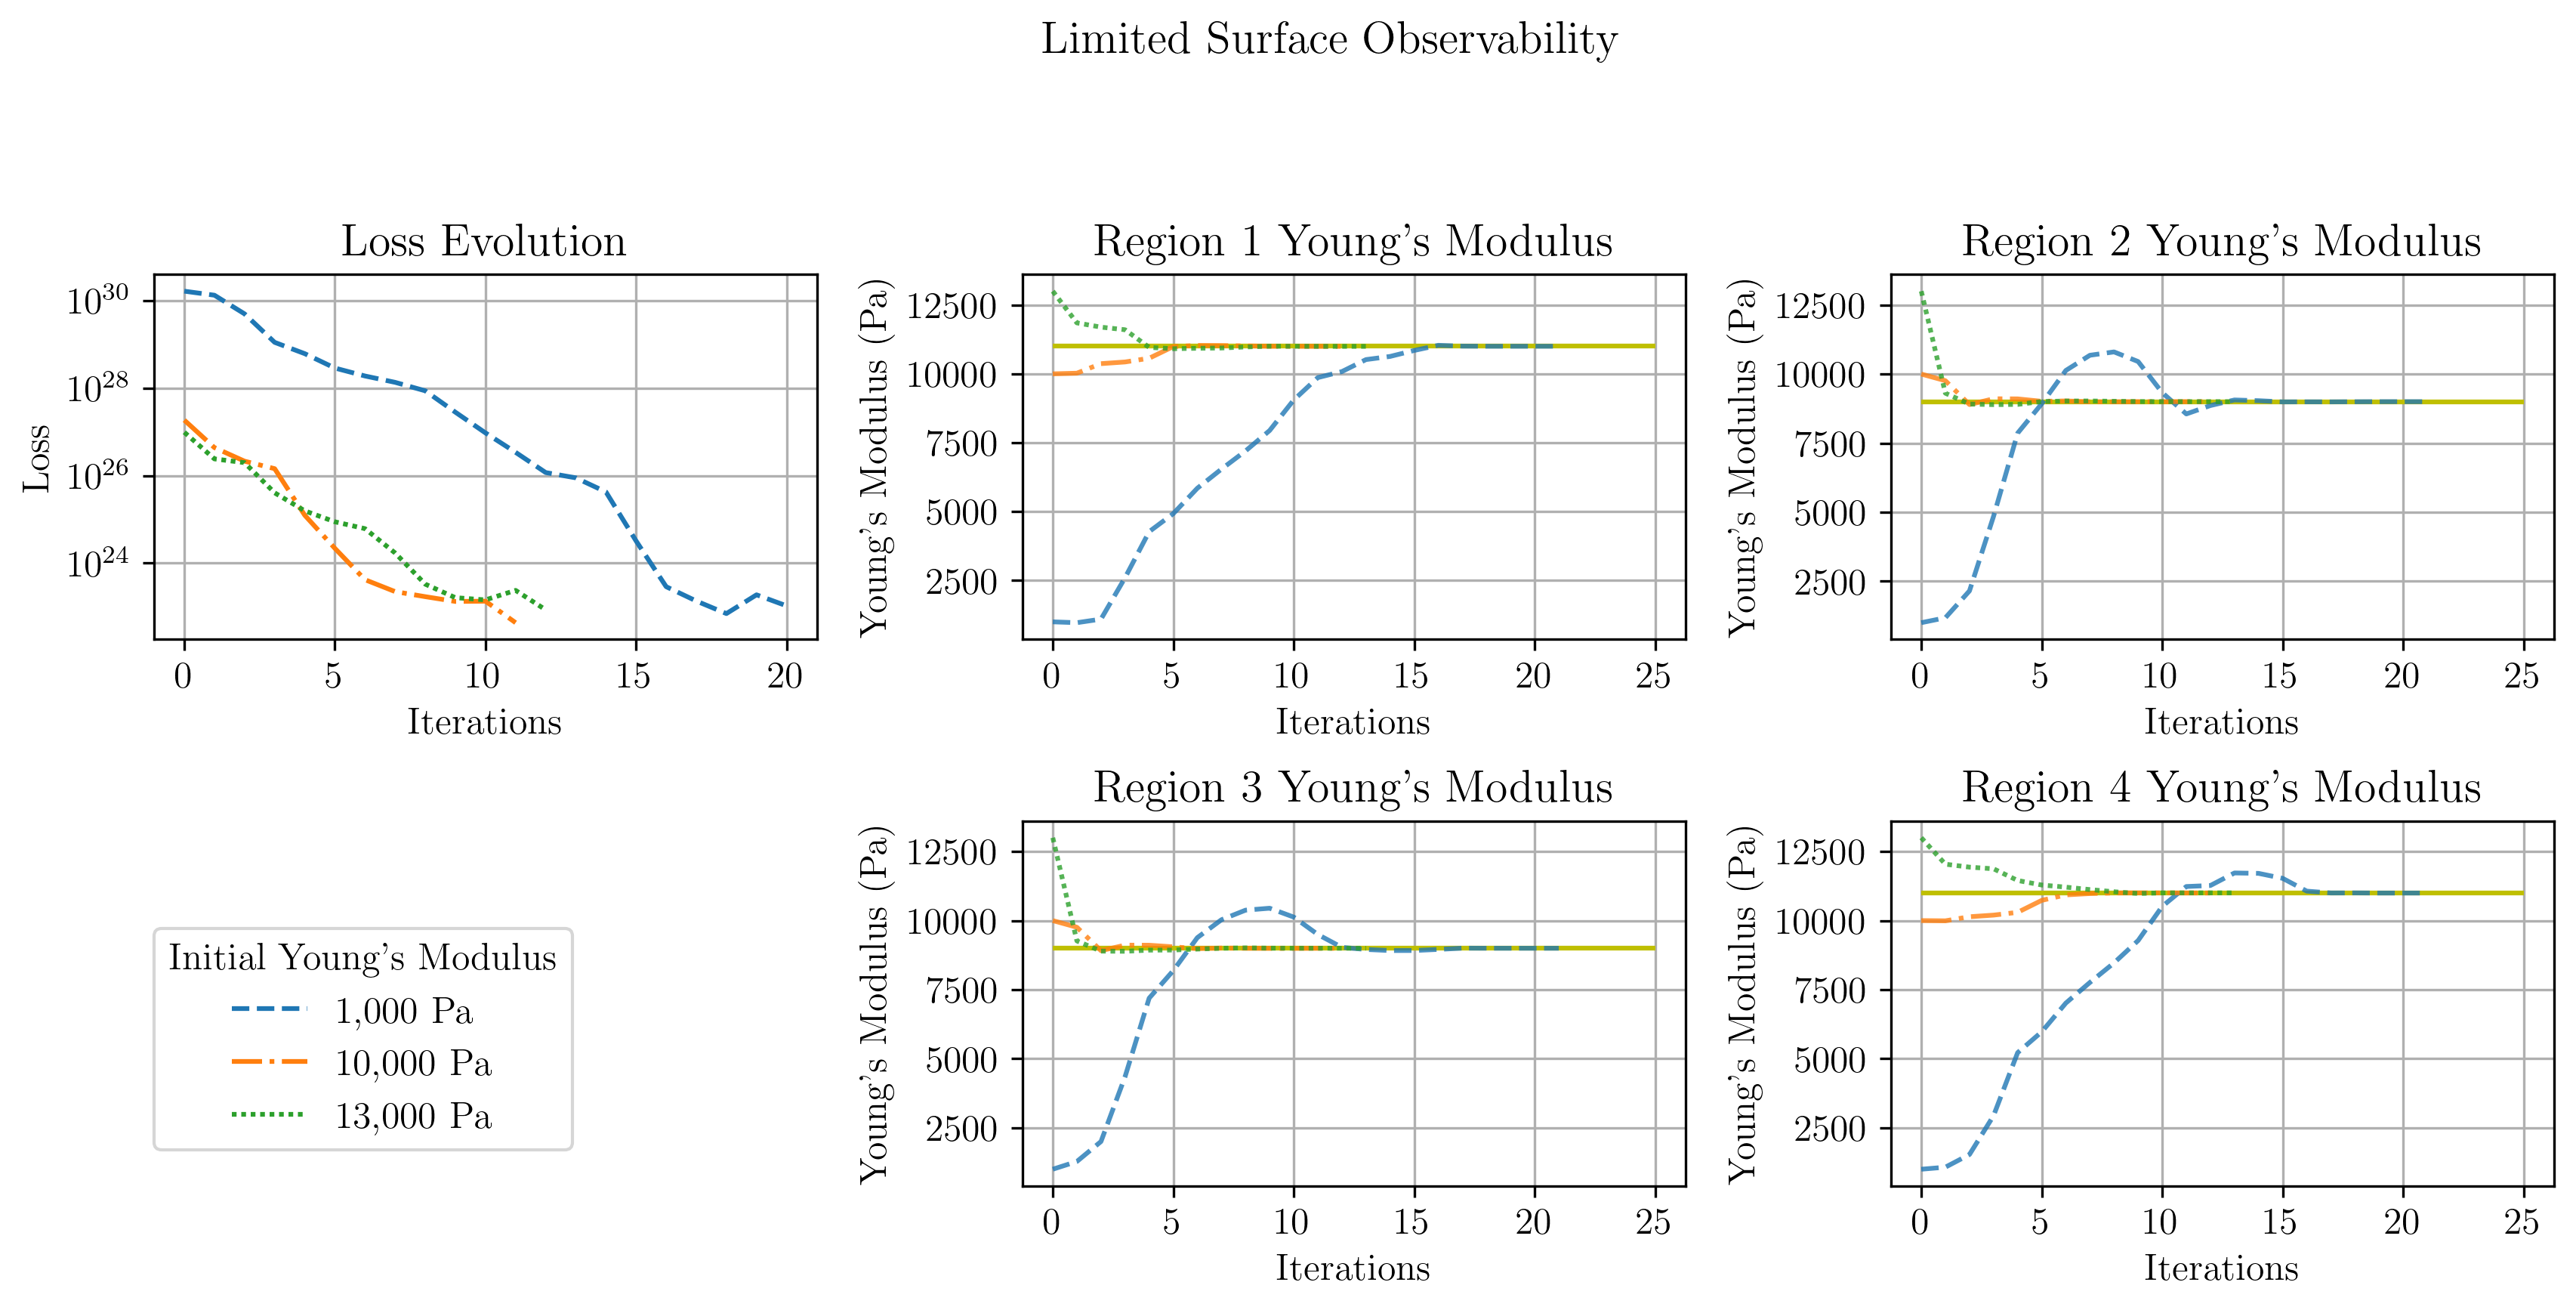

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_1e3_sensor.json',
    'result_1e4_sensor.json',
    'result_13e4_sensor.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)

linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)


keys = ["E1", "E2", "E3", "E4"]
Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
scale = [1, 1, 1, 1, 1, 1]
labels = ['1,000 Pa',
          '10,000 Pa', 
          '13,000 Pa',
          '1e4',
          '2e4',
          '8 particles, $\epsilon_{xx}$']
colors = []

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.suptitle('Limited Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
axs[0, 1].set_xticks(np.arange(0, 30, 5))
axs[0, 2].set_xticks(np.arange(0, 30, 5))
axs[1, 1].set_xticks(np.arange(0, 30, 5))
axs[1, 2].set_xticks(np.arange(0, 30, 5))
axs[0, 1].set_yticks(np.arange(2500, 15000, 2500))
axs[0, 2].set_yticks(np.arange(2500, 15000, 2500))
axs[1, 1].set_yticks(np.arange(2500, 15000, 2500))
axs[1, 2].set_yticks(np.arange(2500, 15000, 2500))
plt.show()


[Taichi] Starting on arch=cuda


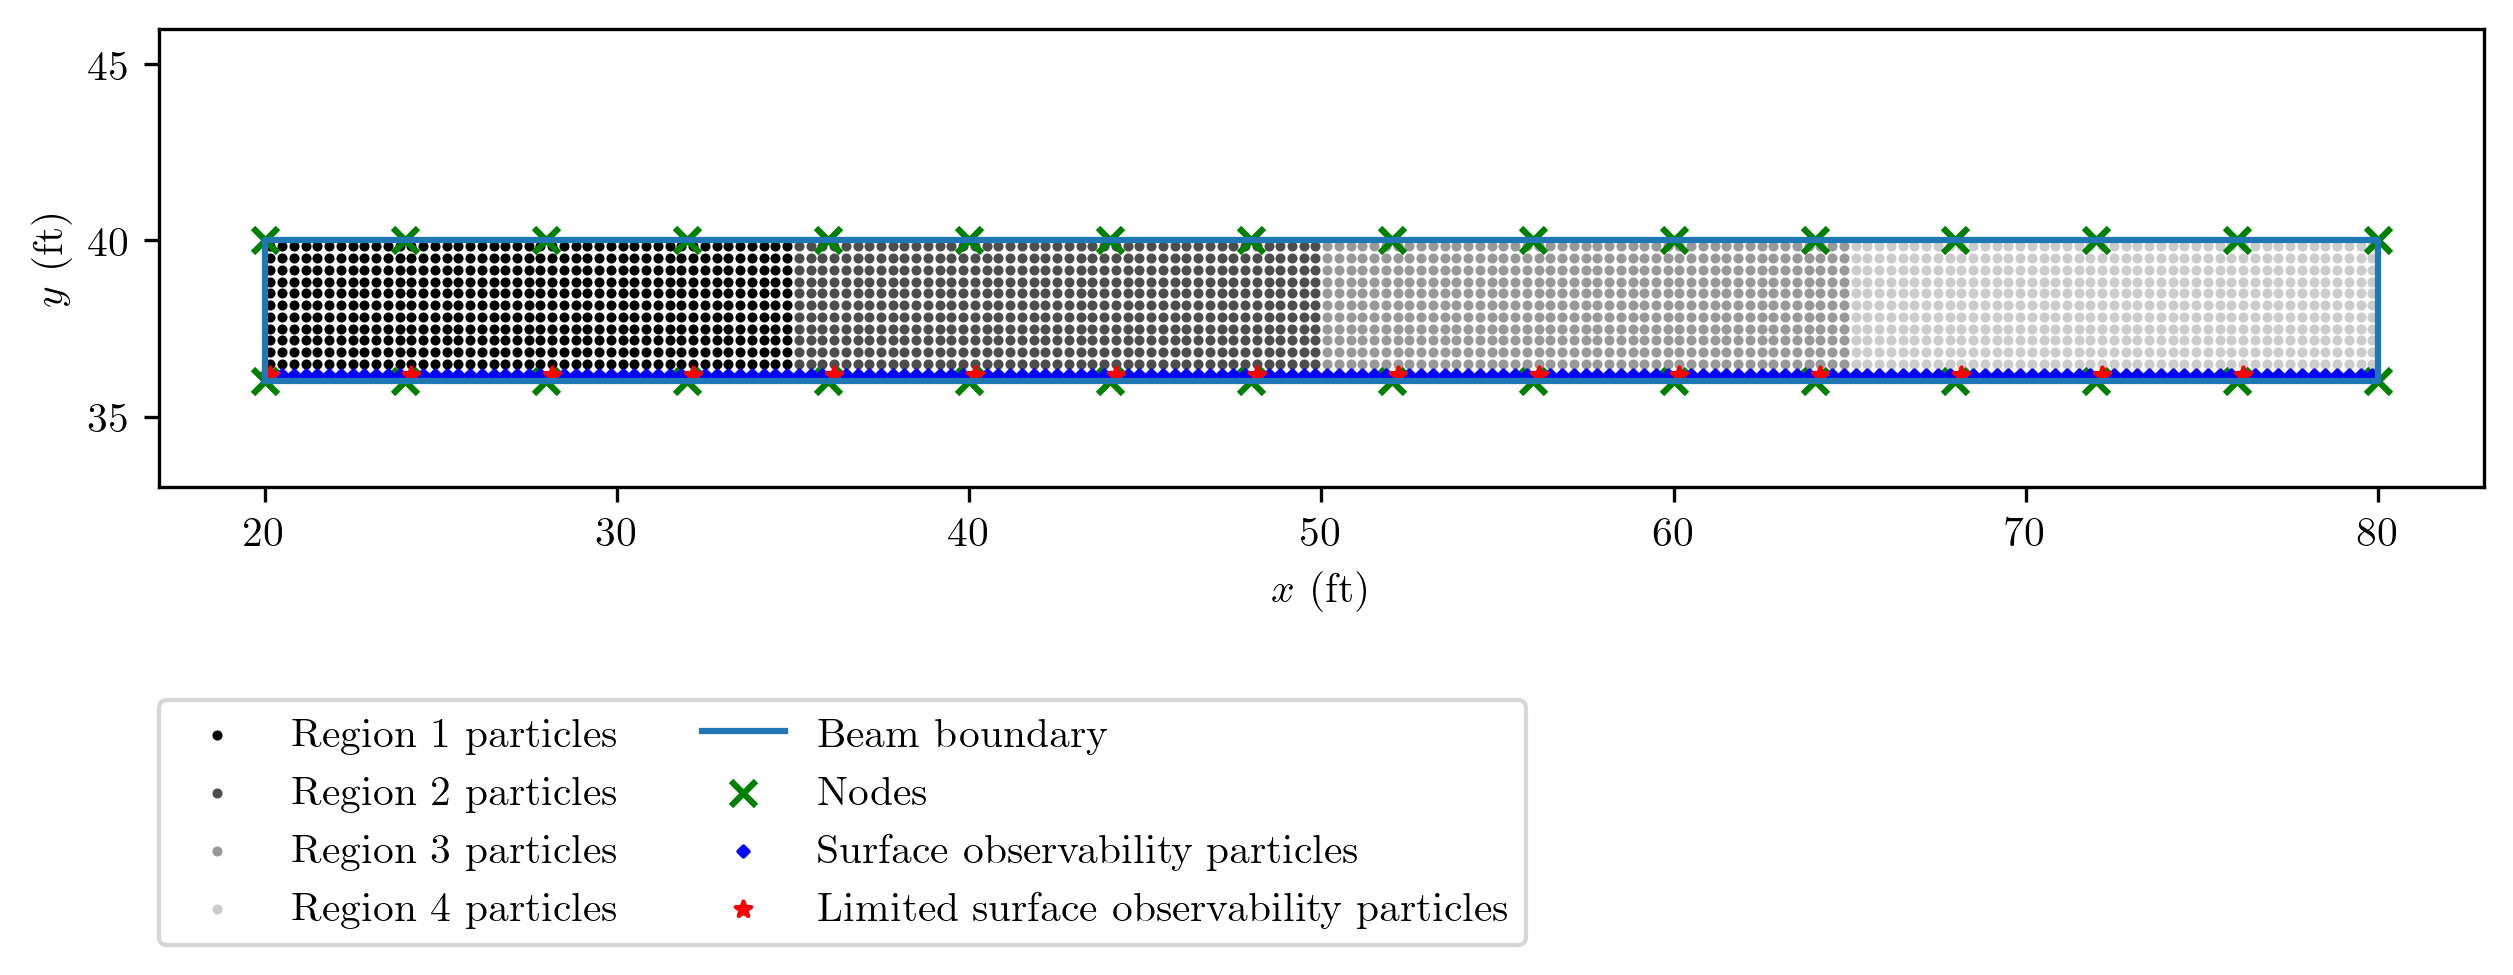

(2160, 2)

In [39]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)
Nx = 180
Ny = 12
n_particles = Nx*Ny
size=100*12
x = ti.Vector.field(2,
                    dtype=real,
                    shape=(n_particles),
                    needs_grad=True)
x_p, y_p = np.zeros(n_particles), np.zeros(n_particles)
x_n, y_n = np.meshgrid(np.arange(16)*4+20, np.arange(2)*4+36)
for i in range(Nx):
    for j in range(Ny):
        x[j * Nx + i] = [
            ((i)/(Nx) * 0.6 + 0.2 + 0.6 / Nx * 0.5) * size/12, 
            ((j)/(Ny) * 0.04 + 0.36 + 0.04 / Ny * 0.5) * size/12]
        x_p[j * Nx + i] = ((i)/(Nx) * 0.6 + 0.2 + 0.6 / Nx * 0.5) * size/12
        y_p[j * Nx + i] = ((j)/(Ny) * 0.04 + 0.36 + 0.04 / Ny * 0.5) * size/12
n_particles = Nx * Ny

x_1, y_1 = np.array([]), np.array([])
x_2, y_2 = np.array([]), np.array([])
x_3, y_3 = np.array([]), np.array([])
x_4, y_4 = np.array([]), np.array([])

for i in range(n_particles):
    col = i % Nx
    if col < 45:
        x_1 = np.append(x_1, x_p[i])
        y_1 = np.append(y_1, y_p[i])
    elif col >= 45 and col < 90:
        x_2 = np.append(x_2, x_p[i])
        y_2 = np.append(y_2, y_p[i])
    elif col >= 90 and col < 135:
        x_3 = np.append(x_3, x_p[i])
        y_3 = np.append(y_3, y_p[i])
    else:
        x_4 = np.append(x_4, x_p[i])
        y_4 = np.append(y_4, y_p[i])

x = x.to_numpy()

matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 20}
def gray(level):
    return (level, level, level)

plt.figure(figsize=(10,3))
s=8
plt.scatter(x_1, y_1, color=gray(0), marker = '.',s=s, label='Region 1 particles')
plt.scatter(x_2, y_2, color=gray(0.3), marker = '.', s=s,label='Region 2 particles')
plt.scatter(x_3, y_3, color=gray(0.6), marker = '.', s=s,label='Region 3 particles')
plt.scatter(x_4, y_4, color=gray(0.8), marker = '.', s=s,label='Region 4 particles')
plt.plot(np.array([0.2, 0.8, 0.8, 0.2, 0.2])*size/12, np.array([0.36, 0.36, 0.4, 0.4, 0.36])*size/12, label='Beam boundary')
plt.scatter(x_n, y_n, color='g', marker='x', label='Nodes')
# plt.scatter(x[:,0], x[:,1], marker='.', label='800 (Full Observability)')
plt.scatter(x[:180,0], x[:180,1], marker='D', s=3, color='blue', label='Surface observability particles')
plt.scatter(x[:180,0][::12], x[:180,1][::12], marker='*', color='r', s=15, label='Limited surface observability particles')

plt.legend(loc=(0, -1), ncol=2)
# plt.title('Material Points Used Per Observability Case')
plt.xlabel('$x$ (ft)')
plt.ylabel('$y$ (ft)')
plt.ylim((33,46))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.savefig('slender_beam.png', dpi=300, bbox_inches = "tight")
plt.show()

x.shape

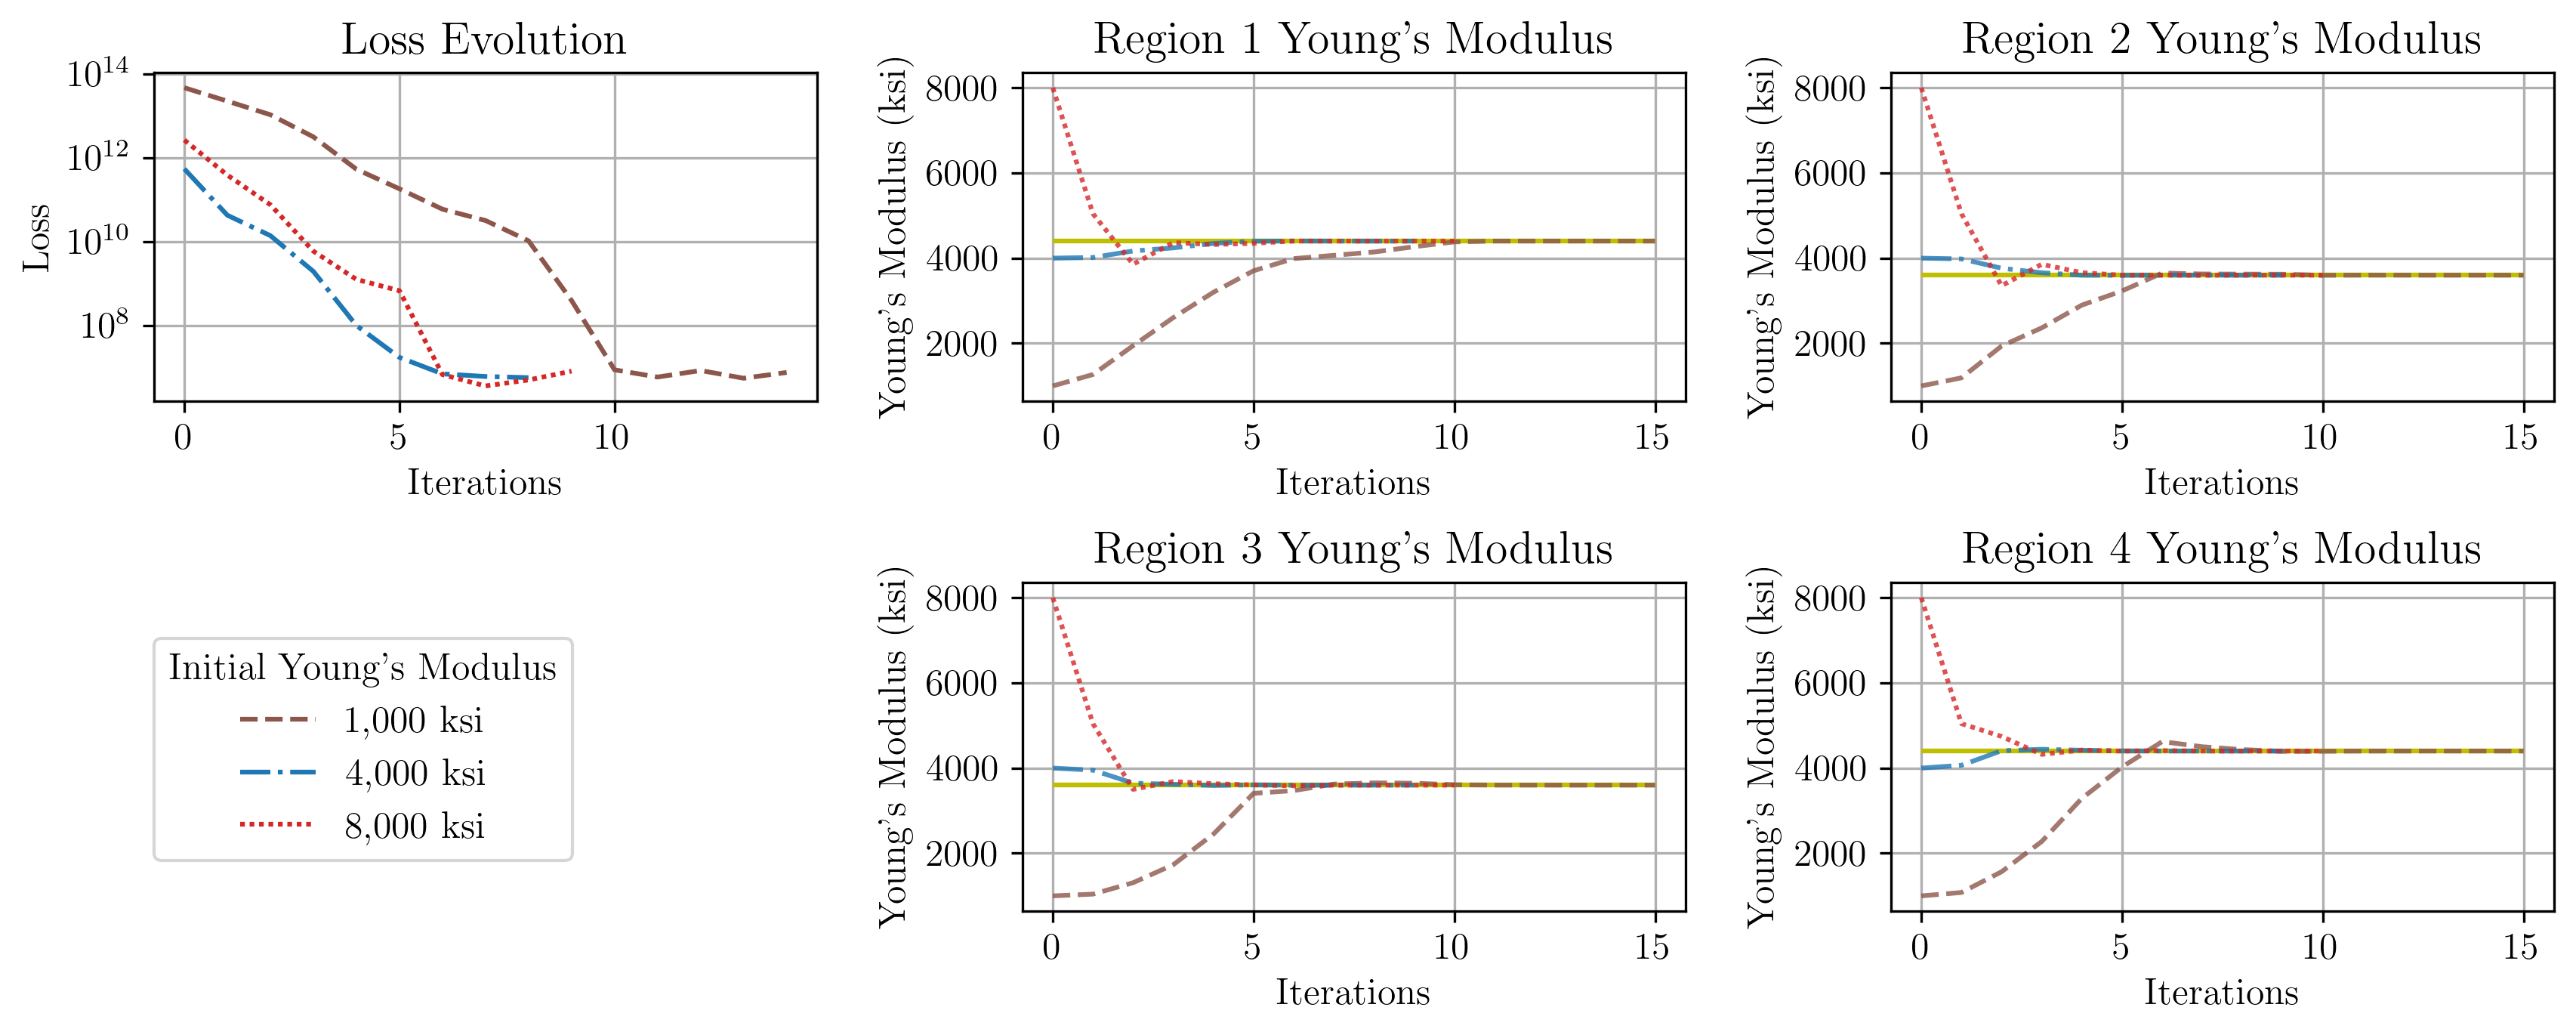

In [7]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

linestyle_str = [
    #  ('solid', 'solid'),      # Same as (0, ()) or '-'
    #  ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
    #  ('loosely dotted',        (0, (1, 10))),
    #  ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
    #  ('loosely dashed',        (0, (5, 10))),
    #  ('dashed',                (0, (5, 5))),
    #  ('densely dashed',        (0, (5, 1))),

    #  ('loosely dashdotted',    (0, (3, 10, 1, 10))),
    #  ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

    #  ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
    #  ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

filenames = [
    'result_c_1000.0_full.json',
    'result_c_4000.0_full.json',
    'result_c_8000.0_full.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
scale = [1, 1, 1, 1e32, 1, 1e16, 1e16]
labels = ['1,000 ksi',
          '4,000 ksi', 
          '8,000 ksi',
          '10,000 Pa',
          '13,000 Pa',
          '20,000 Pa',
          '8 particles, $\epsilon_{xx}$']
colors = [
    'tab:brown',
    'tab:blue',
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:purple'
]

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 5))
# plt.suptitle('Full Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
axs[0, 0].grid(True)
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], color=colors[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (ksi)"
    else:
        y_label = regions[i] + " (k-lb)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 15, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], color=colors[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
# axs[0, 1].set_xticks(np.arange(0, 30, 5))
# axs[0, 2].set_xticks(np.arange(0, 30, 5))
# axs[1, 1].set_xticks(np.arange(0, 30, 5))
# axs[1, 2].set_xticks(np.arange(0, 30, 5))
# axs[0, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[0, 2].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 2].set_yticks(np.arange(5000, 25000, 5000))
plt.show()


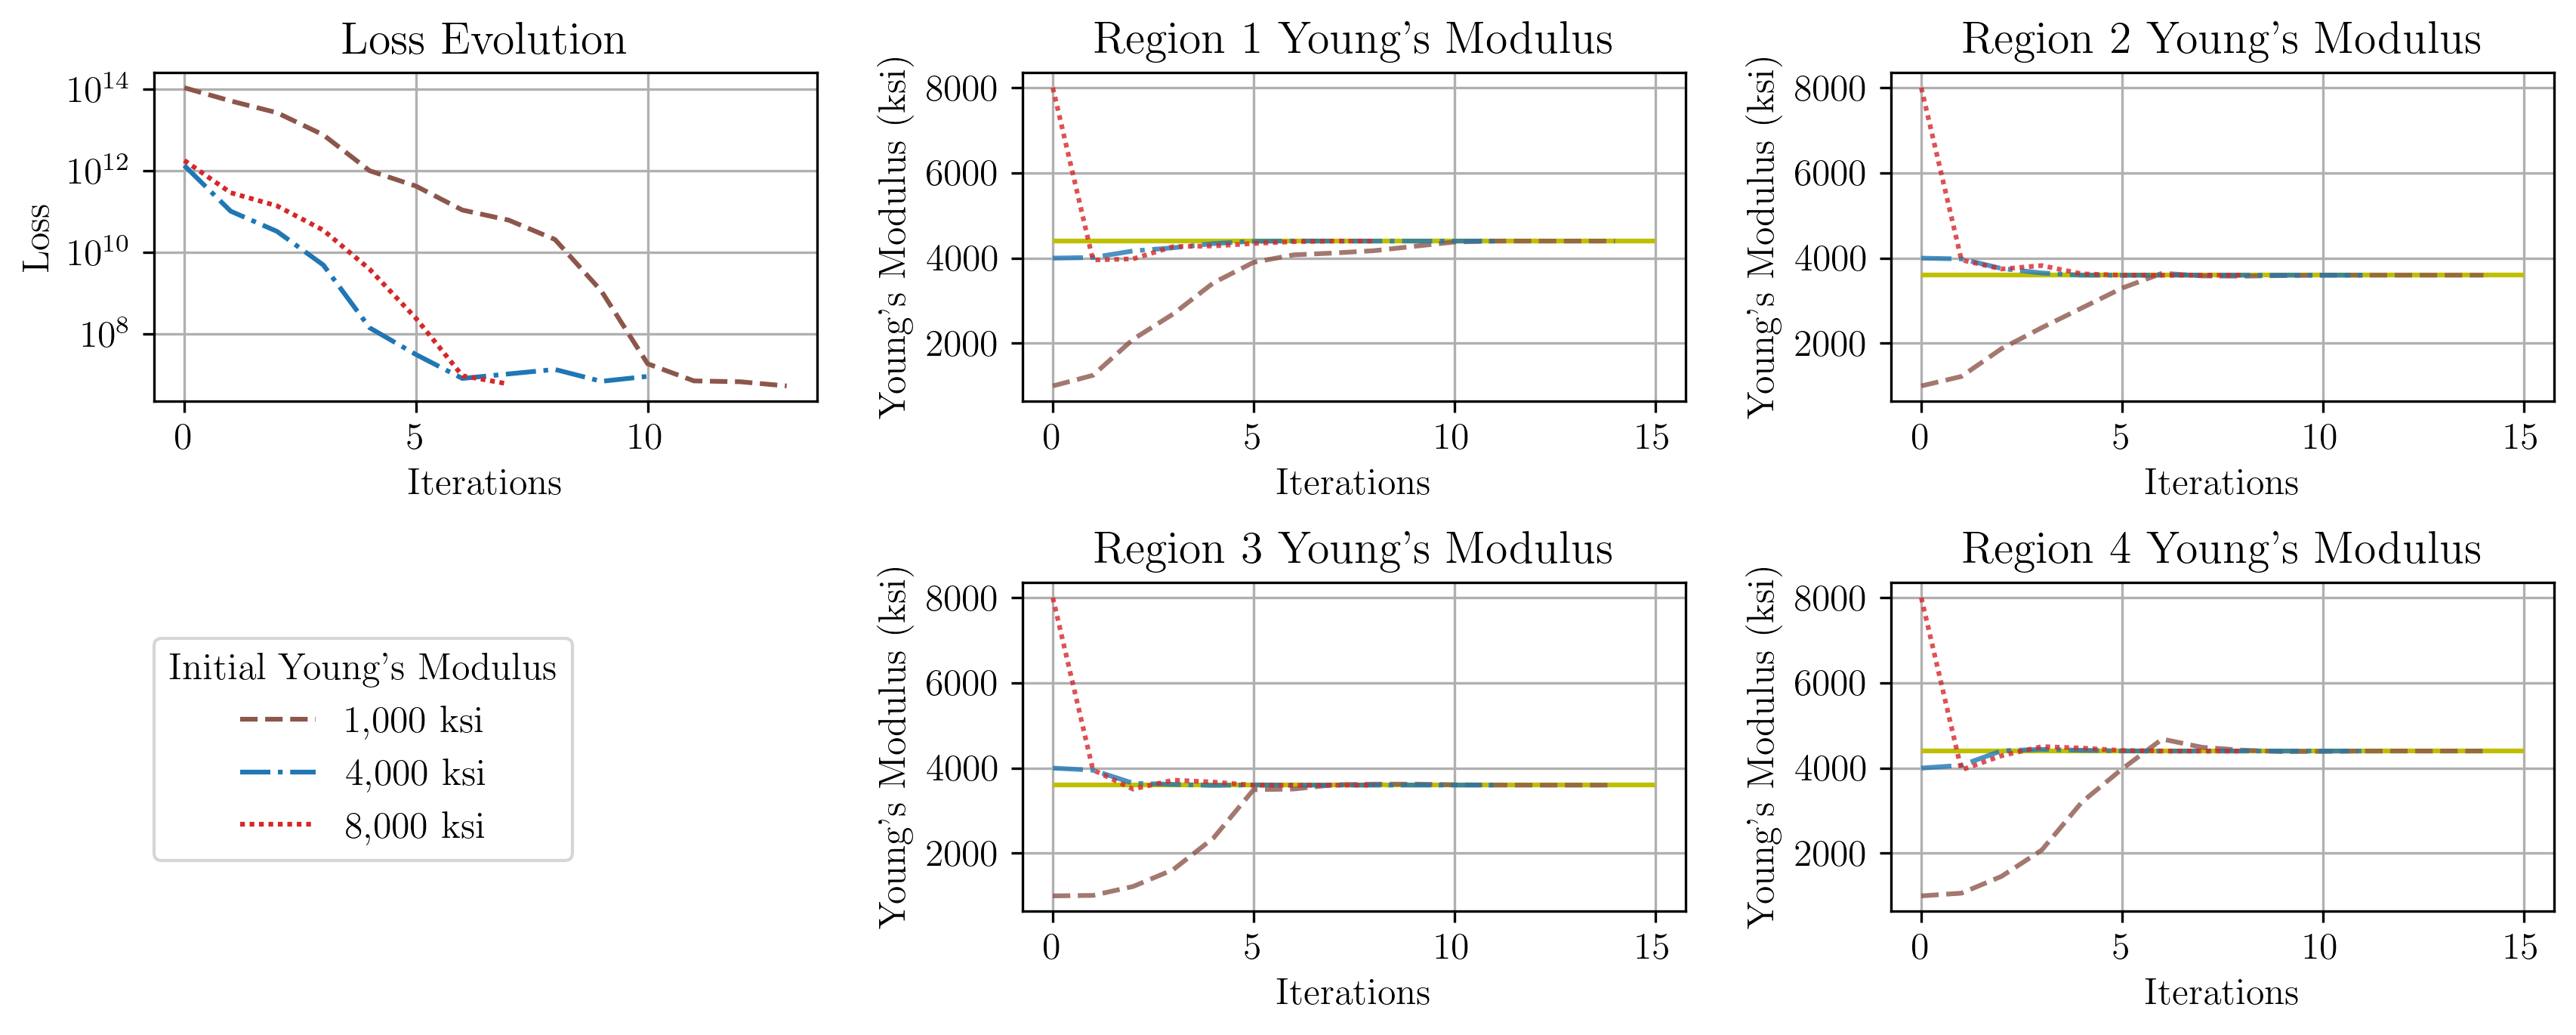

In [6]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

linestyle_str = [
    #  ('solid', 'solid'),      # Same as (0, ()) or '-'
    #  ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
    #  ('loosely dotted',        (0, (1, 10))),
    #  ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
    #  ('loosely dashed',        (0, (5, 10))),
    #  ('dashed',                (0, (5, 5))),
    #  ('densely dashed',        (0, (5, 1))),

    #  ('loosely dashdotted',    (0, (3, 10, 1, 10))),
    #  ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

    #  ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
    #  ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

filenames = [
    'result_c_1000.0_row.json',
    'result_c_4000.0_row.json',
    'result_c_8000.0_row.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
scale = [1, 1, 1, 1e32, 1, 1e16, 1e16]
labels = ['1,000 ksi',
          '4,000 ksi', 
          '8,000 ksi',
          '10,000 Pa',
          '13,000 Pa',
          '20,000 Pa',
          '8 particles, $\epsilon_{xx}$']
colors = [
    'tab:brown',
    'tab:blue',
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:purple'
]

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 5))
# plt.suptitle('Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
axs[0, 0].grid(True)
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], color=colors[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (ksi)"
    else:
        y_label = regions[i] + " (k-lb)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 15, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], color=colors[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
# axs[0, 1].set_xticks(np.arange(0, 30, 5))
# axs[0, 2].set_xticks(np.arange(0, 30, 5))
# axs[1, 1].set_xticks(np.arange(0, 30, 5))
# axs[1, 2].set_xticks(np.arange(0, 30, 5))
# axs[0, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[0, 2].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 2].set_yticks(np.arange(5000, 25000, 5000))
plt.show()


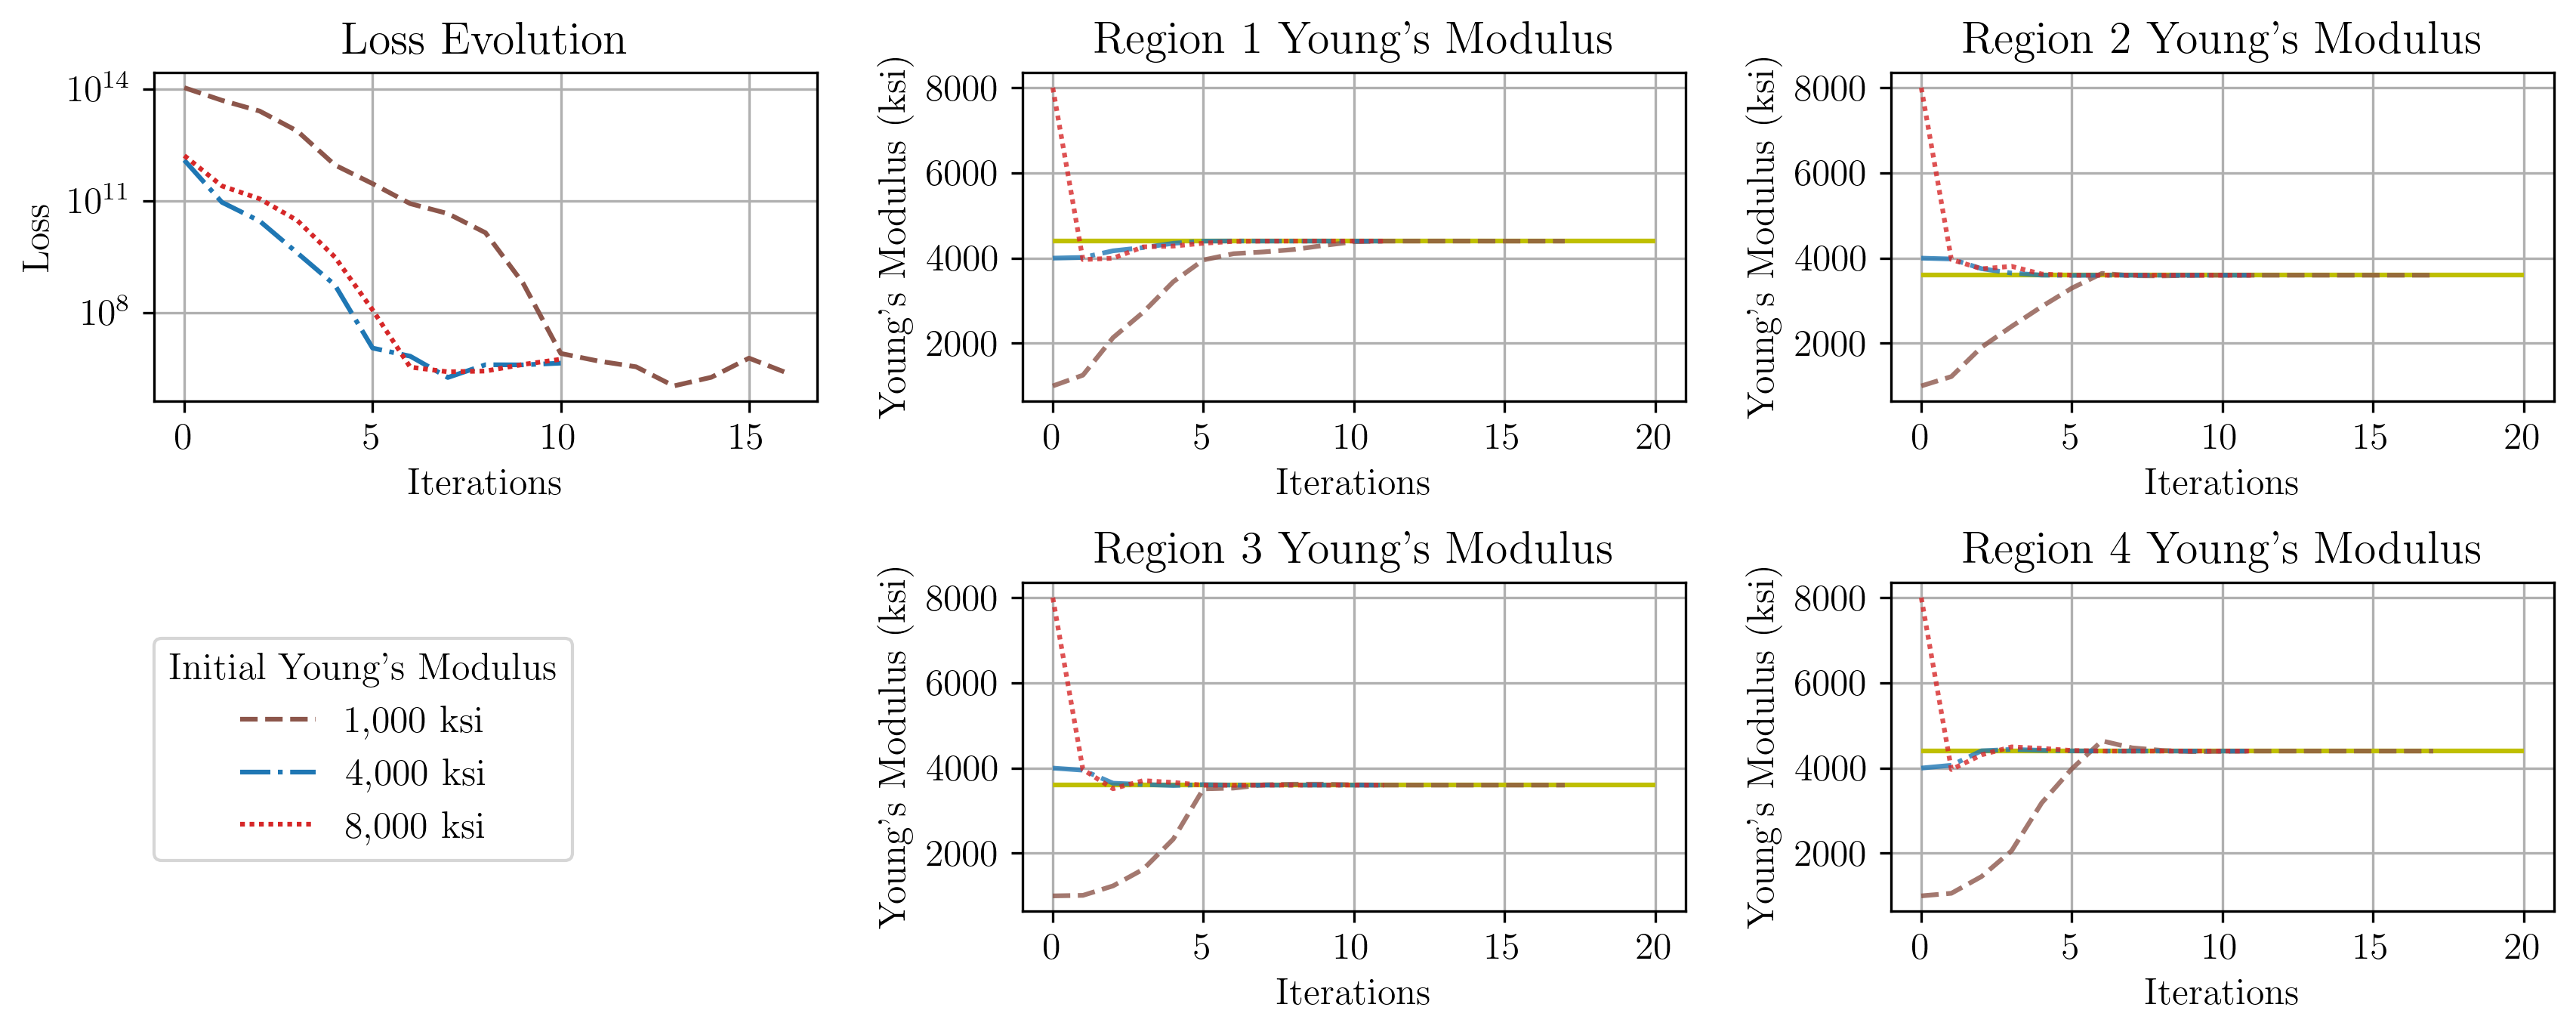

In [5]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

linestyle_str = [
    #  ('solid', 'solid'),      # Same as (0, ()) or '-'
    #  ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
    #  ('loosely dotted',        (0, (1, 10))),
    #  ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
    #  ('loosely dashed',        (0, (5, 10))),
    #  ('dashed',                (0, (5, 5))),
    #  ('densely dashed',        (0, (5, 1))),

    #  ('loosely dashdotted',    (0, (3, 10, 1, 10))),
    #  ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

    #  ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
    #  ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

filenames = [
    'result_c_1000.0_sensor.json',
    'result_c_4000.0_sensor.json',
    'result_c_8000.0_sensor.json',
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)




keys = ["E1", "E2", "E3", "E4"]
Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
scale = [1, 1, 1, 1e32, 1, 1e16, 1e16]
labels = ['1,000 ksi',
          '4,000 ksi', 
          '8,000 ksi',
          '10,000 Pa',
          '13,000 Pa',
          '20,000 Pa',
          '8 particles, $\epsilon_{xx}$']
colors = [
    'tab:brown',
    'tab:blue',
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:purple'
]

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 5))
# plt.suptitle('Limited Surface Observability')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
axs[0, 0].grid(True)
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], color=colors[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1.4), title='Initial Young\'s Modulus')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Region 4 Young\'s Modulus']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (ksi)"
    else:
        y_label = regions[i] + " (k-lb)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 20, color='y', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], color=colors[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
# axs[0, 1].set_xticks(np.arange(0, 30, 5))
# axs[0, 2].set_xticks(np.arange(0, 30, 5))
# axs[1, 1].set_xticks(np.arange(0, 30, 5))
# axs[1, 2].set_xticks(np.arange(0, 30, 5))
# axs[0, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[0, 2].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 1].set_yticks(np.arange(5000, 25000, 5000))
# axs[1, 2].set_yticks(np.arange(5000, 25000, 5000))
plt.show()
